In [18]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

df = pd.read_csv('../../../datasets/parsed_malt_data.csv')
df

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,location,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date
0,Mickael M.,https://dam.malt.com/ecrimpl92gqieb0ijvjo?grav...,Graphiste,-,250,1.00,Quelques jours,['Graphiste'],"['Wordpress', 'Design logo', 'Affiche', 'Carte...",0,"{'Localisation': '21000 Dijon, France'}","Passionné depuis mon enfance par le graphisme,...",0,0,0,mickaelmolina,https://www.malt.fr/profile/mickaelmolina,2013-08-02
1,Nacera TIZI,https://dam.malt.com/erokb7omnnhmf79bojnr?grav...,Commerciale Freelance,-,40,NaN,1h,['Business developers'],['Tanger et tout le Maroc'],0,"{'Localisation': 'Tanger, Tanger-Tétouan, Maroc'}",Parce que La ville de Tanger tend à devenir l'...,0,0,0,naceratizi,https://www.malt.fr/profile/naceratizi,2014-02-22
2,Aurélien D.,https://dam.malt.com/vabndz3c9dkhsimtvgww?grav...,"SysOps, DevOps et développeur web",8-15,550,1.00,1h,"['Administrateur base de données', 'Administra...","['Linux', 'Ansible', 'PHP', 'Apache', 'Proxmox...",0,"{'Localisation': 'La Rochelle, France'}",SysOps (unix) depuis 5 ans et DevOps depuis 4 ...,1,12,0,aureliendazy,https://www.malt.fr/profile/aureliendazy,2013-06-06
3,Youri Galescot,https://dam.malt.com/r3nb6gaf6723bi1unhhx?grav...,Développeur web frontend et backend,-,235,0.33,12h,[],"['PHP', 'HTML5', 'CSS3', 'SEO', 'jQuery', 'Res...",0,"{'Localisation': 'Paris, France'}","Bonjour,Je suis développeur frontend et backen...",0,0,0,yourigalescot,https://www.malt.fr/profile/yourigalescot,2014-02-18
4,Julien Trezeux,https://dam.malt.com/pllhwpaapz84yfqmc7rw?grav...,directeur artistique - graphiste - illustrateur,8-15,350,1.00,1h,"['Photographe', 'Graphiste', 'Illustrateur']","['Direction artistique', 'Graphisme', 'Design ...",0,"{'Localisation': 'Paris, France / www.graphicf...","Graphiste et directeur artistique depuis 2007,...",3,0,0,julientrezeux,https://www.malt.fr/profile/julientrezeux,2014-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193171,Lydia Ronné,https://dam.malt.com/0ab661d5-23a2-4a9a-a3a7-2...,assistante virtuelle,15et+,200,1.00,1h,['Planneur Stratégique'],"['Construction', 'Commerce de gros', 'Services...",0,"{'Localisation': 'Choisy-le-Roi, France'}",Je suis spécialisée dans l'assistance et le co...,0,0,0,lydiaronne,https://www.malt.fr/profile/lydiaronne,2023-10-12
193172,Ophélie D.,https://dam.malt.com/520ca9da-4784-44c5-9833-7...,Conseil Marketplaces | Mirakl Amazon Cdiscount,3-7,300,1.00,4h,['Chef de projet digital'],"['E-commerce', 'Commerce de détail', 'Marketpl...",0,"{'Localisation': 'Lille, France'}",Le saviez-vous ?70% des ventes en ligne se fon...,0,0,0,opheliedelville,https://www.malt.fr/profile/opheliedelville,2023-11-01
193173,Tony Marando,https://dam.malt.com/d2b7425b-8633-4c1c-8e3b-f...,Traducteur,0-2,125,1.00,1h,"['Community Manager', 'Traducteur']","['Traduction Français Anglais', 'Traduction An...",0,"{'Localisation': 'Collonges-sous-Salève, France'}",Hello !Je suis Tony et l’admin du groupe Plans...,0,0,0,tonymarando,https://www.malt.fr/profile/tonymarando,2023-10-26
193174,Matthieu Sager,https://dam.malt.com/c7e64455-efbf-4ec7-ad3e-1...,Ingénieur système,3-7,450,1.00,1h,['Designer Produit Industriel'],"['Industrie électrique', 'Environnement et dév...",0,"{'Localisation': 'Poitiers, France'}",Fort de mes 5 années d'expérience dans le déve...,0,0,0,matthieusager,https://www.malt.fr/profile/matthieusager,2023-10-14


### HOW MUCH DOES EXPERIENCE MATTER?

In [19]:
df_experience = df
df_experience = df_experience[df_experience['experience'] != '-']

How experienced are freelancers ?

[Text(0.5, 0, 'Experience (years)'),
 Text(0, 0.5, 'Price (EUR)'),
 Text(0.5, 1.0, 'Price vs Experience')]

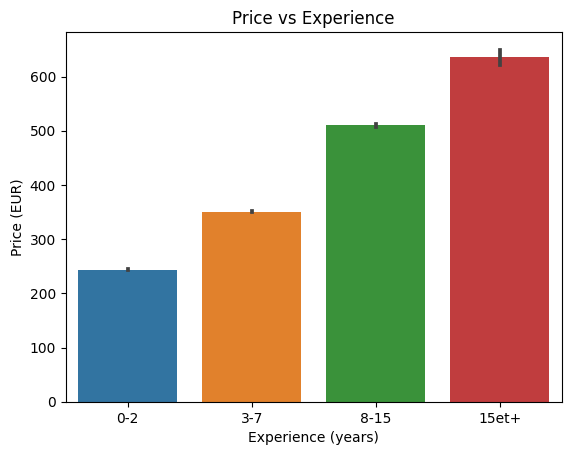

In [20]:
fig = sns.barplot(x='experience', y='price', data=df_experience, order=["0-2", "3-7", "8-15", "15et+"]) # default estimator is mean (to use median: estimator=np.median) NO REAL DIFFERENCE
fig.set(xlabel='Experience (years)', ylabel='Price (EUR)', title='Price vs Experience')

[Text(0.5, 0, 'Experience (years)'),
 Text(0, 0.5, 'Price (EUR)'),
 Text(0.5, 1.0, 'Price vs Experience (Supermalters)')]

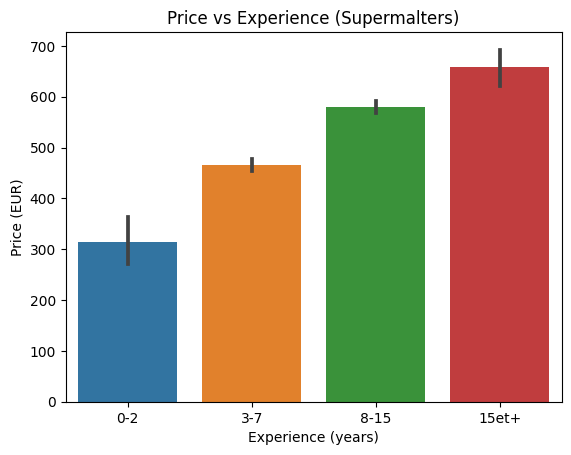

In [21]:
fig = sns.barplot(x='experience', y='price', data=df_experience[df_experience["supermalter"] == 1], order=["0-2", "3-7", "8-15", "15et+"]) # default estimator is mean (to use median: estimator=np.median) NO REAL DIFFERENCE
fig.set(xlabel='Experience (years)', ylabel='Price (EUR)', title='Price vs Experience (Supermalters)')

In [22]:
# STACKED BAR PLOT
# make a stacked barplot to show the proportion of supermalters in each experience category
# df_experience = df_experience.groupby(['experience', 'supermalter']).size().unstack()
# df_experience.plot(kind='bar', stacked=True)


SCATTERPLOT OF EXPERIENCE VS. TJM

[Text(0.5, 0, 'Experience (years)'),
 Text(0, 0.5, 'Price (EUR)'),
 Text(0.5, 1.0, 'Price vs Experience')]

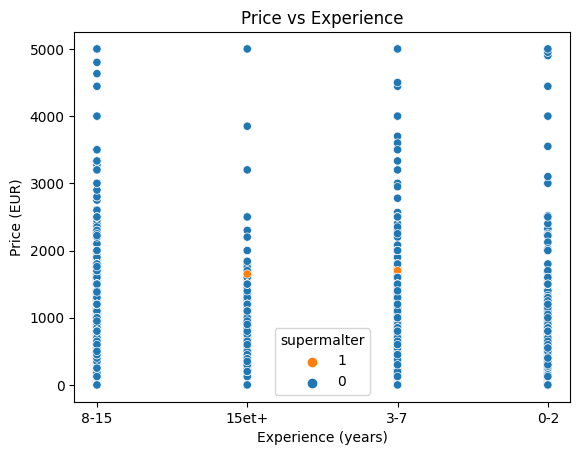

In [27]:
fig = sns.scatterplot(x='experience', y='price', data=df_experience, hue='supermalter', hue_order=[1,0], palette=['#ff7f0e', '#1f77b4'])
fig.set(xlabel='Experience (years)', ylabel='Price (EUR)', title='Price vs Experience')

Does having more experience makes you more likely to be hired ?

[Text(0.5, 0, 'Experience (years)'),
 Text(0, 0.5, 'Missions'),
 Text(0.5, 1.0, 'Missions vs Experience')]

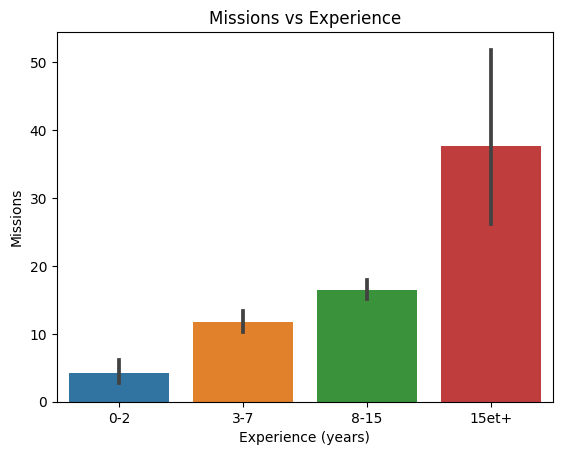

In [24]:
# remove freelancers that haven't done any missions
df_experience_cleaned = df_experience[df_experience['missions'] != 0]

fig = sns.barplot(x='experience', y='missions', data=df_experience_cleaned, order=["0-2", "3-7", "8-15", "15et+"]) # default estimator is mean (to use median: estimator=np.median) NO REAL DIFFERENCE
fig.set(xlabel='Experience (years)', ylabel='Missions', title='Missions vs Experience')

number of supermalter per experience level (are there more supermalter in the most experienced freelancers ?)